In [3]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from census import Census
#from config import (census_key, gkey)
#import gmaps
#import requests
#import time
#from us import states

In [4]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
pollution_df = pd.read_csv(csv_path)
pollution_df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [5]:

# Display a statistical overview of the DataFrame
pollution_df["State Code"].describe()



count    1.746661e+06
mean     2.230907e+01
std      1.725621e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.700000e+01
75%      4.000000e+01
max      8.000000e+01
Name: State Code, dtype: float64

In [6]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
pollution_df['year'] = pd.DatetimeIndex(pollution_df['Date Local']).year
pollution_df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN,2000
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,2000
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN,2000
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0,2000
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN,2000


In [7]:
# Delete extraneous column
del pollution_df['Unnamed: 0']
pollution_df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN,2000
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,2000
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN,2000
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0,2000
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN,2000


In [8]:
yr_df = pollution_df.groupby(['year'])
ave_yr = yr_df.mean()
ave_yr

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
year,,,,,,,,,,,,,,,,,,,
2000,21.583157,80.815726,1304.218187,17.433768,32.844986,12.274360,30.969971,0.024374,0.039143,10.101761,36.018528,3.635001,8.706905,10.188377,14.257266,0.555605,1.002820,8.774480,9.540111
2001,20.090778,72.652871,1303.424082,17.601948,33.072649,12.203463,31.312336,0.025387,0.040566,10.127673,37.639492,3.120901,7.863073,9.799298,12.835229,0.506644,0.929252,8.517732,8.792794
2002,20.345299,67.395715,1145.645849,16.385855,31.014175,12.100661,29.362276,0.026819,0.041767,10.180390,39.560711,2.729866,6.724265,9.488134,11.030911,0.498662,0.881102,8.360223,8.486661
2003,20.594528,70.611056,1163.446075,15.864934,29.947360,12.151184,28.332485,0.025527,0.039844,10.169680,36.641705,2.851912,6.955952,9.707702,11.327609,0.490559,0.850875,8.317322,8.246795
2004,20.898179,73.518134,1268.449187,14.975201,28.494426,12.067317,26.946582,0.024901,0.038773,10.094299,34.727521,2.841329,6.879984,9.638954,11.247233,0.446285,0.764395,8.344920,7.412931
2005,19.969945,70.404681,1327.223708,15.010923,29.000439,12.027966,27.417807,0.025742,0.040385,10.151563,37.011672,2.900743,6.901690,9.526928,11.186187,0.415658,0.715437,8.017831,6.893456
2006,25.014845,68.754797,1200.240125,14.531508,28.559908,11.812920,26.994615,0.025937,0.039971,10.216077,36.200766,2.596110,6.122259,9.590109,10.006128,0.413375,0.726352,7.943087,6.966187
2007,23.472170,70.403942,1218.171809,13.285443,26.422592,11.535007,24.966103,0.026379,0.040197,10.155723,36.416717,2.341500,5.578362,9.450762,9.055128,0.373295,0.617226,7.676923,6.030215
2008,23.554911,68.855607,1229.599562,12.240446,24.874386,11.512936,23.492376,0.026093,0.039431,10.170600,35.421844,1.894672,4.527777,9.184368,7.309846,0.328974,0.549430,7.574158,5.320949


In [9]:
yr_no2_group = ave_yr.loc[:,["NO2 AQI"]]
no2_aqi = yr_no2_group['NO2 AQI']

years = no2_aqi.keys()


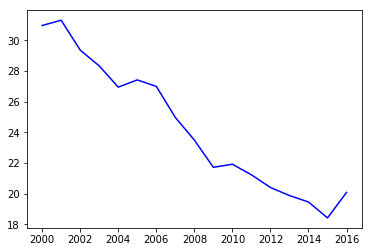

In [10]:

years_pol = plt.plot(years, no2_aqi, color="blue", label="NO2 AQI Over the Years" )

plt.show()

In [10]:
yr_o3_group = ave_yr.loc[:,["O3 AQI"]]
o3_aqi = yr_o3_group['O3 AQI']

o3_years = o3_aqi.keys()

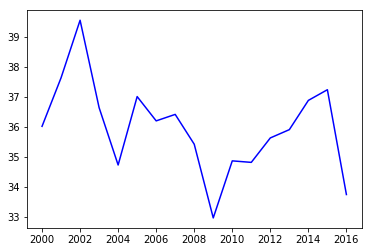

In [11]:
years_o3 = plt.plot(o3_years, o3_aqi, color="blue", label="NO2 AQI Over the Years" )

plt.show()

In [12]:
yr_so2_group = ave_yr.loc[:,["SO2 AQI"]]
so2_aqi = yr_so2_group['SO2 AQI']

so2_years = so2_aqi.keys()

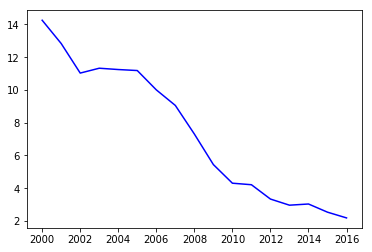

In [13]:
years_so2 = plt.plot(so2_years, so2_aqi, color="blue", label="NO2 AQI Over the Years" )

plt.show()

In [14]:
yr_co_group = ave_yr.loc[:,["CO AQI"]]
co_aqi = yr_co_group['CO AQI']

co_years = co_aqi.keys()

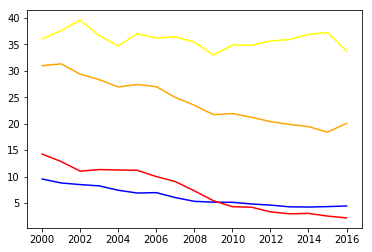

In [16]:
years_co = plt.plot(co_years, co_aqi, color="blue", label="CO AQI Over the Years" )

years_so2 = plt.plot(so2_years, so2_aqi, color="red", label="SO2 AQI Over the Years" )

years_pol = plt.plot(years, no2_aqi, color="orange", label="NO2 AQI Over the Years" )

years_o3 = plt.plot(o3_years, o3_aqi, color="yellow", label="O3 AQI Over the Years" )

plt.show()

In [11]:
state_yr = pollution_df.groupby(['State', 'year'])

state_yr

In [12]:
state_no2 = pollution_df.loc[:,["State", "NO2 AQI", "year"]]
state_no2_group = state_no2.groupby(["State", 'year'])
state_no2_group.mean()


NO2 AQI
State      year           
Alabama    2013  21.387097
           2014  21.495854
           2015  20.026667
           2016  23.093960
Alaska     2014  21.167598
           2015  18.634340
Arizona    2000  47.117747
           2001  41.488154
           2002  43.522438
           2003  41.893014
           2004  38.657319
           2005  38.991687
           2006  38.385482
           2007  36.419304
           2008  35.930195
           2009  33.803967
           2010  32.005663
           2011  31.613012
           2012  34.274322
           2013  30.119145
           2014  31.296820
           2015  26.220581
           2016  29.652941
Arkansas   2007  22.887363
           2008  19.838798
           2009  18.849315
           2010  21.809028
           2011  21.115068
           2012  23.766234
           2013  22.013699
...                    ...
Utah       2013  22.533199
           2014  26.757962
           2015  29.814229
           2016  43.142857
Virginia   2000  30.075020
           2006  24.231211
           2007  23.469914
           2008  20.951613
           2009  24.116928
           2010  19.856725
           2011  16.039620
           2012  16.080119
           2013  14.497835
           2014  11.020668
           2015  11.483204
           2016  20.550000
Washington 2013  23.756757
           2014  20.380952
           2015  20.982143
           2016  26.586207
Wisconsin  2006  26.152299
           2007  26.322581
Wyoming    2007   6.094183
           2008   6.762058
           2011  11.891862
           2012  11.709722
           2013  11.206416
           2014   8.973533
           2015   9.368617
           2016  10.288889

[496 rows x 1 columns]

In [64]:
stateno2 = state_no2_group.loc[:,["NO2 AQI"]]
sno2_aqi = stateno2['NO2 AQI']

sno2_years = sno2_aqi.keys()

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [ ]:
state_yrs_no2.plt.plot(sno2_years, sno2_aqi, color="blue", label="CO AQI Over the Years" )

In [6]:
pollution_df.count()

State Code           1746661
County Code          1746661
Site Num             1746661
Address              1746661
State                1746661
County               1746661
City                 1746661
Date Local           1746661
NO2 Units            1746661
NO2 Mean             1746661
NO2 1st Max Value    1746661
NO2 1st Max Hour     1746661
NO2 AQI              1746661
O3 Units             1746661
O3 Mean              1746661
O3 1st Max Value     1746661
O3 1st Max Hour      1746661
O3 AQI               1746661
SO2 Units            1746661
SO2 Mean             1746661
SO2 1st Max Value    1746661
SO2 1st Max Hour     1746661
SO2 AQI               873754
CO Units             1746661
CO Mean              1746661
CO 1st Max Value     1746661
CO 1st Max Hour      1746661
CO AQI                873338
year                 1746661
dtype: int64

In [17]:
state_df = pollution_df.groupby(['State'])
state_ave = state_df.mean()
state_ave

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,73.000000,23.000000,9.410693,22.969098,13.158029,21.232246,0.024612,0.038434,9.293026,36.845170,1.034236,4.230198,10.756238,7.005115,0.212607,0.407386,9.446257,3.850288,2014.725528
Alaska,2.0,90.000000,34.000000,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340,2014.637285
Arizona,4.0,14.997766,3877.818184,19.067975,38.398603,14.230985,36.106987,0.024989,0.043125,10.122022,39.004095,1.364213,2.728664,10.247938,4.213486,0.490616,0.982476,9.511755,9.191023,2007.698024
Arkansas,5.0,119.000000,7.000000,9.753701,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,1.383302,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914,2011.673610
California,6.0,53.797397,1599.569823,13.651894,25.592142,11.264417,24.110238,0.026053,0.038820,10.204474,35.722673,1.146695,2.331772,8.508692,3.598278,0.447485,0.769284,7.430949,7.405669,2007.483221
Colorado,8.0,14.871490,1791.432960,19.634275,38.079445,10.618961,35.958878,0.023551,0.038193,10.033335,34.673582,1.507634,5.977720,9.037683,10.605523,0.443112,0.814280,8.691912,7.724205,2009.411504
Connecticut,9.0,5.618314,1489.556109,8.990965,19.579982,10.423412,18.457355,0.028920,0.040321,10.459226,37.149400,0.912121,2.327872,10.747269,3.221925,0.250866,0.366647,8.229045,3.586407,2011.298400
Country Of Mexico,80.0,2.000000,7.300652,20.331830,40.299600,13.217968,37.989060,0.021917,0.036104,9.617505,31.957711,1.945775,4.197170,10.853461,6.565839,0.853503,1.985410,10.312329,17.700525,2007.621502
Delaware,10.0,3.000000,2004.000000,11.584773,23.194050,11.089256,21.541047,0.026494,0.038084,10.110193,35.400000,1.014242,2.189091,10.987052,2.819835,0.261600,0.401025,8.929477,3.839384,2012.819284


In [40]:
state_no2_group = state_ave.loc[:,["NO2 AQI"]]
top_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=False)
low_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=True)
no2_high = top_state_no2.head(5)
no2_low = low_state_no2.head(5)


In [41]:
state_o3_group = state_ave.loc[:,["O3 AQI"]]
top_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=False)
low_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=True)
o3_high = top_state_o3.head(5)
o3_low = low_state_o3.head(5)


In [42]:
state_so2_group = state_ave.loc[:,["SO2 AQI"]]
top_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=False)
low_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=True)
so2_high = top_state_so2.head(5)
so2_low = low_state_so2.head(5)

In [43]:
state_co_group = state_ave.loc[:,["CO AQI"]]
top_state_co = state_co_group.sort_values("CO AQI", ascending=False)
low_state_co = state_co_group.sort_values("CO AQI", ascending=True)
co_high = top_state_co.head(5)
co_low = low_state_co.head(5)

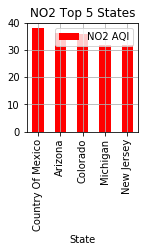

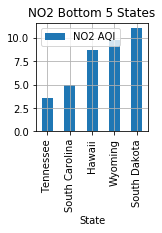

In [46]:
no2_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Top 5 States", color='red')
no2_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Bottom 5 States")

plt.show()

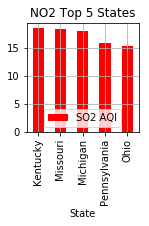

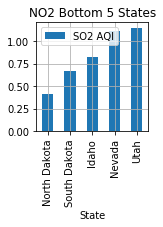

In [47]:
so2_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Top 5 States", color='red')
so2_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Bottom 5 States")

plt.show()

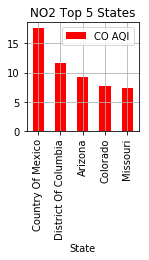

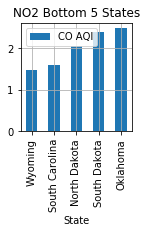

In [48]:
co_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Top 5 States", color='red')
co_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Bottom 5 States")

plt.show()

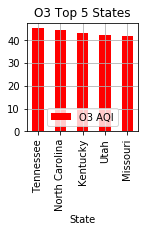

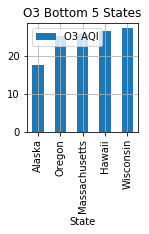

In [50]:
o3_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="O3 Top 5 States", color='red')
o3_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="O3 Bottom 5 States")

plt.show()

In [6]:

# Drop all rows with missing information
drop_null = pollution_df.dropna(how='any')


In [7]:
# Verify dropped rows
drop_null.count()

State Code           436876
County Code          436876
Site Num             436876
Address              436876
State                436876
County               436876
City                 436876
Date Local           436876
NO2 Units            436876
NO2 Mean             436876
NO2 1st Max Value    436876
NO2 1st Max Hour     436876
NO2 AQI              436876
O3 Units             436876
O3 Mean              436876
O3 1st Max Value     436876
O3 1st Max Hour      436876
O3 AQI               436876
SO2 Units            436876
SO2 Mean             436876
SO2 1st Max Value    436876
SO2 1st Max Hour     436876
SO2 AQI              436876
CO Units             436876
CO Mean              436876
CO 1st Max Value     436876
CO 1st Max Hour      436876
CO AQI               436876
year                 436876
dtype: int64

In [8]:
drop_null

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,2000
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0,2000
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0,2000
13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,...,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0,2000
17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,...,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0,2000
21,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-06,Parts per billion,39.950000,...,6.761905,17.0,7,24.0,Parts per million,2.308333,3.6,9,41.0,2000
25,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-07,Parts per billion,29.625000,...,8.666667,21.0,7,30.0,Parts per million,1.829167,3.5,23,40.0,2000
29,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-08,Parts per billion,29.666667,...,8.250000,18.0,0,26.0,Parts per million,2.787500,5.1,2,57.0,2000
33,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-09,Parts per billion,25.083333,...,6.500000,13.0,19,19.0,Parts per million,1.675000,2.8,2,32.0,2000
37,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-10,Parts per billion,37.666667,...,9.958333,21.0,20,30.0,Parts per million,2.179167,3.7,23,42.0,2000


In [9]:
# Get a reference to the column names
pollution_df.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'year'],
      dtype='object')

In [10]:
#general data
poll_data = pollution_df[["Address", "State","State Code", "County", "County Code","City","Site Num","Date Local"
                          ]]
poll_data.head()

,Address,State,State Code,County,County Code,City,Site Num,Date Local
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,2000-01-01
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,2000-01-01
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,2000-01-01
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,2000-01-01
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,2000-01-02


In [11]:
#NO2 data
NO2_data = pollution_df[["Address", "State","State Code", "County", "County Code","City","Site Num",
                         "NO2 Units", "NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI"
                          ]]
NO2_data.head()

,Address,State,State Code,County,County Code,City,Site Num,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,19.041667,49.0,19,46
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,19.041667,49.0,19,46
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,19.041667,49.0,19,46
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,19.041667,49.0,19,46
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,22.958333,36.0,19,34


In [12]:
#NO2 data group it 
NO2_group = pollution_df[["State","County","City","NO2 AQI","Date Local","year","Site Num"
                          ]]
NO2_group.head()

,State,County,City,NO2 AQI,Date Local,year,Site Num
0,Arizona,Maricopa,Phoenix,46,2000-01-01,2000,3002
1,Arizona,Maricopa,Phoenix,46,2000-01-01,2000,3002
2,Arizona,Maricopa,Phoenix,46,2000-01-01,2000,3002
3,Arizona,Maricopa,Phoenix,46,2000-01-01,2000,3002
4,Arizona,Maricopa,Phoenix,34,2000-01-02,2000,3002


In [13]:
# Grouping the DataFrame by "Assignee"
citycounty_group = NO2_group.groupby(["State","County","City"])

citycounty_group


In [14]:
# Count how many of each component Assignees worked on and create DataFrame of the data
citycounty_grpdisplay = pd.DataFrame(citycounty_group["Site Num"].value_counts())
citycounty_grpdisplay

Site Num
State      County                City               Site Num          
Alabama    Jefferson             Birmingham         23            3126
Alaska     Fairbanks North Star  Fairbanks          34            1974
Arizona    Maricopa              Phoenix            3002         22568
                                                    9997         15344
                                 Scottsdale         3003          8674
           Pima                  Tucson             1011         15848
                                                    1028          7406
Arkansas   Pulaski               North Little Rock  7            35332
California Alameda               Berkeley           2004          4460
                                 Oakland            11            7796
                                                    10            1950
           Contra Costa          Bethel Island      1002         23396
                                 Concord            2            23686
                                 Crockett           10            1892
                                 Pittsburg          3001         13076
                                 San Pablo          1004         18128
                                                    1003          3832
           Fresno                Fresno             8             7934
                                                    11            5722
                                                    244            826
                                                    243            820
           Humboldt              Eureka             1004         12200
                                 Not in a city      1005          6346
           Imperial              Calexico           5            22420
           Kern                  Bakersfield        14             434
           Los Angeles           Burbank            1002         18870
                                 Hawthorne          5001          6046
                                 Long Beach         4002         18082
                                                    4006          7022
                                 Los Angeles        1103         25225
...                                                                ...
Tennessee  Meigs                 Not in a city      104            964
Texas      Bexar                 Not in a city      622           3368
                                 San Antonio        55            3574
           Dallas                Dallas             69           23406
           El Paso               El Paso            37           20982
                                                    58            9414
                                                    44            6512
           Harris                Deer Park          1039          7676
                                 Houston            1035         21054
                                                    416          12572
           McLennan              Waco               1037         12480
           Travis                Austin             14            2170
Utah       Duchesne              Roosevelt          2              104
           Salt Lake             Salt Lake City     3006          6580
           Uintah                Not in a city      5632          1984
Virginia   Alexandria City       Alexandria         9             5876
                                 Not in a city      21            1060
           Fairfax               Annandale          1005          4042
                                 McLean             5001          5604
                                 Not in a city      5             5530
                                 Seven Corners      1004          1446
           Hampton City          Hampton            8             4724
           Henrico               East Highland Park 14            5976
           Roanoke               Vinton             1004          2164
Washington King

In [15]:
#O3 data

O3_data = pollution_df[["Address", "State","State Code", "County", "County Code","City","Site Num",
                         "O3 Units", "O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"
                          ]]
O3_data.head()

,Address,State,State Code,County,County Code,City,Site Num,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.022500,0.040,10,34
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.022500,0.040,10,34
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.022500,0.040,10,34
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.022500,0.040,10,34
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.013375,0.032,10,27


In [16]:
#SO2 data
SO2_data = pollution_df[["Address", "State","State Code", "County", "County Code","City","Site Num",
                         "SO2 Units", "SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI"
                          ]]
SO2_data.head()

,Address,State,State Code,County,County Code,City,Site Num,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,3.000000,9.0,21,13.0
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,3.000000,9.0,21,13.0
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,2.975000,6.6,23,NaN
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,2.975000,6.6,23,NaN
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per billion,1.958333,3.0,22,4.0


In [17]:
#CO data
CO_data = pollution_df[["Address", "State","State Code", "County", "County Code","City","Site Num",
                         "CO Units", "CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI"
                          ]]
CO_data.head()

,Address,State,State Code,County,County Code,City,Site Num,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,1.145833,4.2,21,NaN
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.878947,2.2,23,25.0
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,1.145833,4.2,21,NaN
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.878947,2.2,23,25.0
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,4,Maricopa,13,Phoenix,3002,Parts per million,0.850000,1.6,23,NaN


In [18]:
country_data = pollution_df[["County Code", "County"]]
country_data

,County Code,County
0,13,Maricopa
1,13,Maricopa
2,13,Maricopa
3,13,Maricopa
4,13,Maricopa
5,13,Maricopa
6,13,Maricopa
7,13,Maricopa
8,13,Maricopa
9,13,Maricopa


In [19]:
unique = country_data["County"].unique()
unique

array(['Maricopa', 'Pima', 'Contra Costa', 'Imperial', 'Kern',
       'Los Angeles', 'Orange', 'Riverside', 'Sacramento',
       'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara',
       'Santa Cruz', 'Solano', 'Ventura', 'Adams', 'District of Columbia',
       'Cook', 'Marion', 'Linn', 'Sumner', 'Wyandotte', 'Boyd', 'Daviess',
       'Fayette', 'Henderson', 'Jefferson', 'McCracken',
       'East Baton Rouge', 'Wayne', 'Saint Louis', 'St. Louis City',
       'Camden', 'Bronx', 'Queens', 'Suffolk', 'Forsyth', 'Mecklenburg',
       'Cherokee', 'Kay', 'Allegheny', 'Beaver', 'Berks', 'Blair',
       'Bucks', 'Cambria', 'Lackawanna', 'Lancaster', 'Lawrence',
       'Montgomery', 'Northampton', 'Philadelphia', 'Washington',
       'Westmoreland', 'York', 'Dallas', 'El Paso', 'Harris', 'Fairfax',
       'Alexandria City', 'Alameda', 'Saint Clair', 'Clark', 'Essex',
       'Ottawa', 'Kent', 'Hillsborough', 'Haywood', 'Meigs', 'Fresno',
       'Charleston', 'Denver', 'Erie', 'Humb

In [21]:
# Removing the newlines from column headers
pollution_df = eclipse_df.rename(columns={"Bug\nID": "Bug ID",
                                        "Assignee\nReal\nName": "Assignee Real Name",
                                        "Number of\nComments": "Number of Comments",
                                        "Reporter\nReal\nName": "Reporter Real Name",
                                        "Target\nMilestone": "Target Milestone"})
eclipse_df.columns

NameError: name 'eclipse_df' is not defined

In [ ]:
# Finding the average number of comments per bug
average_comments = pollution_df["Number of Comments"].mean()
average_comments

In [ ]:
# Grouping the DataFrame by "Assignee"
assignee_group = eclipse_df.groupby("Assignee")

# Count how many of each component Assignees worked on and create DataFrame of the data
assignee_work = pd.DataFrame(assignee_group["Component"].value_counts())
assignee_work.head()

In [ ]:
# Rename the "Component" column to "Component Bug Count"
assignee_work = assignee_work.rename(
    columns={"Component": "Component Bug Count"})
assignee_work.head()

In [ ]:
# Find the percentage of bugs overall fixed by each Assignee
total_bugs = eclipse_df["Assignee"].count()
bugs_per_user = assignee_group["Assignee"].count()

user_bug_percent = pd.DataFrame((bugs_per_user/total_bugs)*100)
user_bug_percent.head()

In [ ]:
# Rename the "Assignee" column to "Percent of Total Bugs Assigned"
user_bug_percent = user_bug_percent.rename(
    columns={"Assignee": "Percent of Total Bugs Assigned"})

# Reset the index for this DataFrame so "Assignee" is a column
user_bug_percent = user_bug_percent.reset_index()
user_bug_percent.head()

In [ ]:
# Reset the index of "assignee_group" so that "Assignee" and "Component" are columns
assignee_work = assignee_work.reset_index()
assignee_work.head()

# Merge the "Percent of Total Bugs Assigned" into the DataFrame
assignee_work = assignee_work.merge(user_bug_percent, on="Assignee")

# Remove the extra columns
assignee_work = assignee_work[["Assignee", "Percent of Total Bugs Assigned",
                               "Component", "Component Bug Count"]]
assignee_work.head()